In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("csse_covid_19_daily_reports_us.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

There are 58 rows in the dataset.

Province_State, Country_Region, Last_Update, ISO3 are categorical columns.

Lat, Long_, Recovered, Active, Incident_Rate, People_Tested, People_Hospitalized, Mortality_Rate, Testing_Rate, Hospitalization_Rate are float columns.

Confirmed, Deaths, FIPS, UID are Integer columns.

We have some blank values in columns, also there are many unnecessary columns which we can remove straight away as per the description of the dataset.

We can straight away remove these columns as they are unnecessary for our model.

In [4]:
df.drop(["Country_Region", "Last_Update", "FIPS", "UID", "ISO3"],1,inplace=True)

In [5]:
#Let's see some statistical features of the columns

df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,402.682539,2.987834e+05,13185.628145,2.135002,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,148.521021,4.608100e+04,535.000000,3.072626,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,250.477287,1.386545e+05,1493.000000,4.403318,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,477.888542,2.796948e+05,4389.000000,5.466238,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


Minimum count in Confirmed is 0 but recovered is 13, this dataset doesn't seems so reliable in real world. Never matter, we need to make the model using the given dataset only.

Since we have 2 missing vaues in Lat_ and Long_ and no missing value in Province_State, so i think it s better to keep it rather than Lat and Long_.
But first let's see what is the value of Province where Lat and Long are missing

In [6]:
len(df['Province_State'].unique())

58

In [7]:
df['Lat'].unique()

array([ 32.3182,  61.3707, -14.271 ,  33.7298,  34.9697,  36.1162,
        39.0598,  41.5978,  39.3185,      nan,  38.8974,  27.7663,
        33.0406,  13.4443,  21.0943,  44.2405,  40.3495,  39.8494,
        42.0115,  38.5266,  37.6681,  31.1695,  44.6939,  39.0639,
        42.2302,  43.3266,  45.6945,  32.7416,  38.4561,  46.9219,
        41.1254,  38.3135,  43.4525,  40.2989,  34.8405,  42.1657,
        35.6301,  47.5289,  15.0979,  40.3888,  35.5653,  44.572 ,
        40.5908,  18.2208,  41.6809,  33.8569,  44.2998,  35.7478,
        31.0545,  40.15  ,  44.0459,  18.3358,  37.7693,  47.4009,
        38.4912,  44.2685,  42.756 ])

In [8]:
df.loc[df['Lat'].isna(), 'Province_State']

9     Diamond Princess
13      Grand Princess
Name: Province_State, dtype: object

In [9]:
df.loc[df['Long_'].isna(), 'Province_State']

9     Diamond Princess
13      Grand Princess
Name: Province_State, dtype: object

Where Lat and Long_ values are missing we have Province_State values as ["Diamond Princess" and "Grand Princess"], but we don't have any other row where we have "Diamond Princess" and "Grand Princess" as "Province_State" values but "Lat" and "Long_" values present, also Lat and Long_ are no such value which we could replace with any substitute, so let's remove these columns as well.

In [10]:
df.drop(["Lat", "Long_"],1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             42 non-null     float64
 4   Active                58 non-null     float64
 5   Incident_Rate         56 non-null     float64
 6   People_Tested         56 non-null     float64
 7   People_Hospitalized   33 non-null     float64
 8   Mortality_Rate        57 non-null     float64
 9   Testing_Rate          56 non-null     float64
 10  Hospitalization_Rate  33 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.1+ KB


11 columns remaining.

Seems we have some missing values in Recoveres column which is our target variable. let's take some insight into it.

In [12]:
df['Recovered'].unique()

array([       nan, 3.5200e+02, 3.7730e+03, 3.8520e+03, 3.4780e+03,
       6.2640e+03, 3.9650e+03, 1.0590e+03, 1.2500e+02, 5.7800e+02,
       1.6680e+03, 8.3620e+03, 4.7300e+02, 2.8260e+03, 2.6249e+04,
       1.1000e+03, 2.9930e+03, 2.8234e+04, 1.2227e+04, 7.6810e+03,
       4.4000e+02, 3.3600e+02, 1.2750e+03, 2.3945e+04, 1.8820e+03,
       6.1886e+04, 1.1637e+04, 1.3020e+03, 1.3000e+01, 4.2660e+03,
       1.4060e+03, 1.0300e+03, 5.4510e+03, 3.0230e+03, 1.1783e+04,
       3.0341e+04, 4.4230e+03, 8.2400e+02, 6.1000e+01, 4.5230e+03,
       9.5000e+02, 7.7280e+03, 5.2800e+02])

In [13]:
#Let's see number of cases confirmed where number of recoveries is unknown/missing.

df.loc[df['Recovered'].isna(), 'Confirmed']

0      13052
2          0
5      85997
9         49
11     47471
12     39801
13       103
17    100418
18     29274
25     88970
29     11528
31     11122
40     29436
43     68126
44      2866
54     18971
Name: Confirmed, dtype: int64

In [14]:
#Putting 0 in Recovered where Confirmed is 0

df['Recovered'][(df['Recovered'].isna()) & (df['Confirmed'] == 0)] = 0

In [15]:
df[['Confirmed','Recovered']][(df['Recovered'].isna())]

,Confirmed,Recovered
0,13052,NaN
5,85997,NaN
9,49,NaN
11,47471,NaN
12,39801,NaN
13,103,NaN
17,100418,NaN
18,29274,NaN
25,88970,NaN
29,11528,NaN


Since we have missing values for the target variable in the dataset, then we can either remove them or maybe impute them using a model prediction itself.

Let's leave them as is and we can predict the missing values for recovered column using model prediction, by keeping the missing value rows as test data.

In [16]:
df['Deaths'].describe()

count       58.000000
mean      1611.017241
std       4084.750891
min          0.000000
25%         74.000000
50%        385.000000
75%       1394.250000
max      28636.000000
Name: Deaths, dtype: float64

We don't have missing values in deaths column so we can easily divide our dataset and we can use the same train data and test data for predicting our missing recovered values.

# EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             43 non-null     float64
 4   Active                58 non-null     float64
 5   Incident_Rate         56 non-null     float64
 6   People_Tested         56 non-null     float64
 7   People_Hospitalized   33 non-null     float64
 8   Mortality_Rate        57 non-null     float64
 9   Testing_Rate          56 non-null     float64
 10  Hospitalization_Rate  33 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.1+ KB


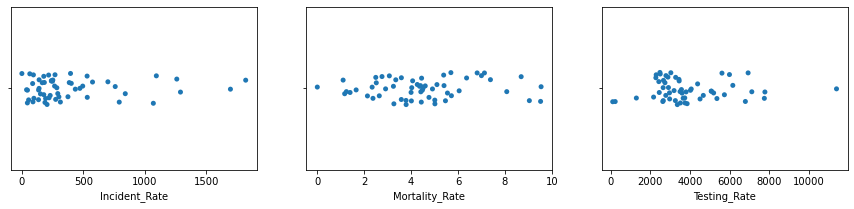

In [18]:
arr = ["Incident_Rate","Mortality_Rate", "Testing_Rate"]
plt.figure(figsize=(15,3))
for i,j in enumerate(arr):
    plt.subplot(1,3,i+1)
    sns.stripplot(df[j])
plt.show()

We can see that unique values of above three columns have approx same number of occurrences, with some putliers as well.

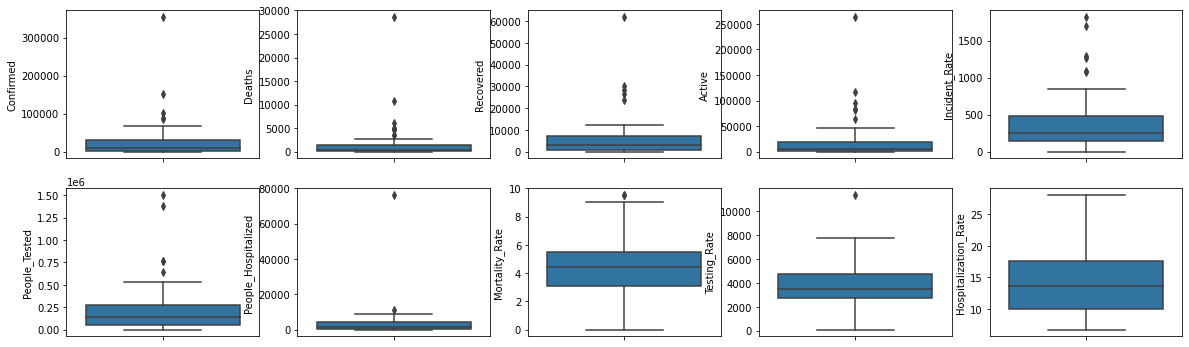

In [19]:
plt.figure(figsize=(20,6))
for i,j in enumerate(df.columns[1:]):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[j], orient="v")
plt.show()

We have some outliers in Confirmed, Deaths, Recovered, Active. But since we can see that there are some outliers in Incident rate also which means that data is outliers are to be expected.

Mortality Rate seems pretty evenly spread, with negligible outliers, we can treat outliers of Confirmed and we can see how it cacades to other columns.

In [20]:
from scipy.stats import zscore

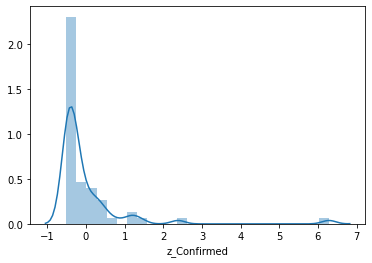

In [21]:
df['z_Confirmed'] = zscore(df['Confirmed'])
sns.distplot(df['z_Confirmed'])

Very positively skewed, let's check magnitude of skewness

In [22]:
df['z_Confirmed'].skew()

4.708614332934411

In [23]:
#Count number of rows with zscore gteater than 3

df.loc[df['z_Confirmed'] > 3, 'z_Confirmed'].count()

1

In [24]:
df = df[df['z_Confirmed'] < 3]
df.shape

(57, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        57 non-null     object 
 1   Confirmed             57 non-null     int64  
 2   Deaths                57 non-null     int64  
 3   Recovered             42 non-null     float64
 4   Active                57 non-null     float64
 5   Incident_Rate         55 non-null     float64
 6   People_Tested         55 non-null     float64
 7   People_Hospitalized   32 non-null     float64
 8   Mortality_Rate        56 non-null     float64
 9   Testing_Rate          55 non-null     float64
 10  Hospitalization_Rate  32 non-null     float64
 11  z_Confirmed           57 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 5.8+ KB


We have removed 1 row, let's see what impact it has on outliers in other columns

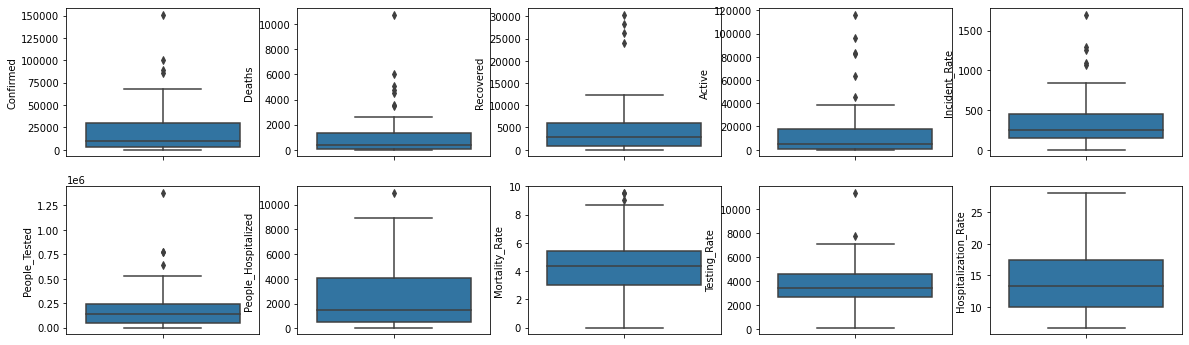

In [26]:
plt.figure(figsize=(20,6))
for i,j in enumerate(df.columns[1:-1]):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[j], orient="v")
plt.show()

It has substantially improved the boxplot.

Let's see plot between Deaths, Recovered with other columns usinf bivariate analysis.

<Figure size 1440x432 with 0 Axes>

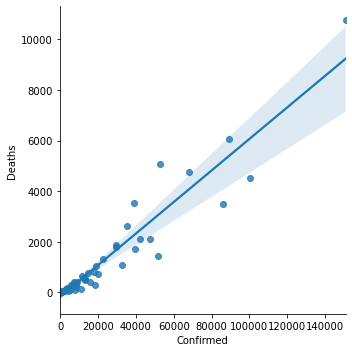

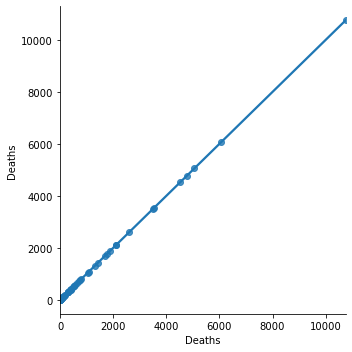

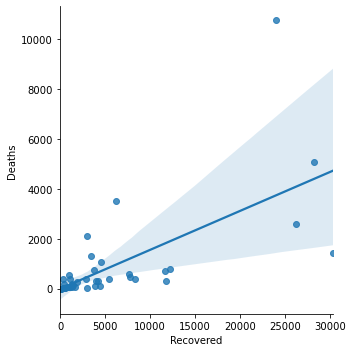

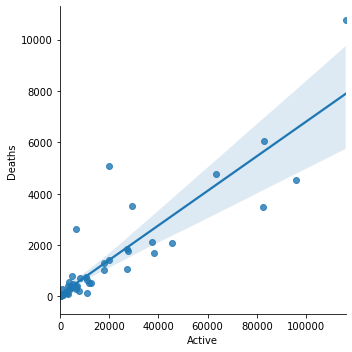

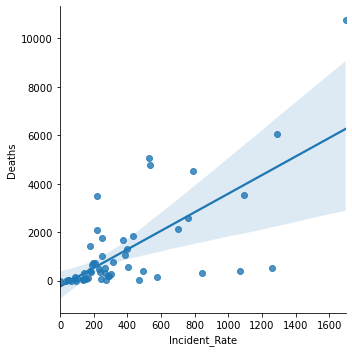

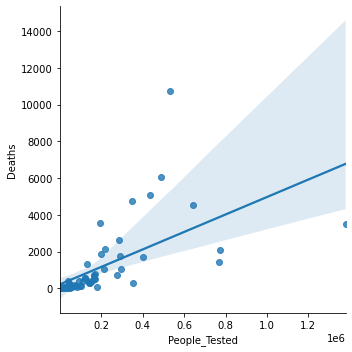

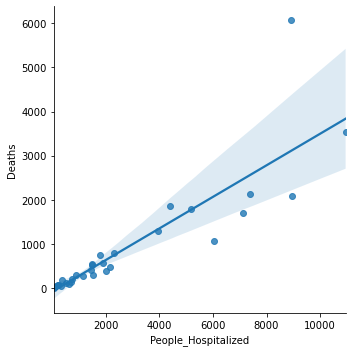

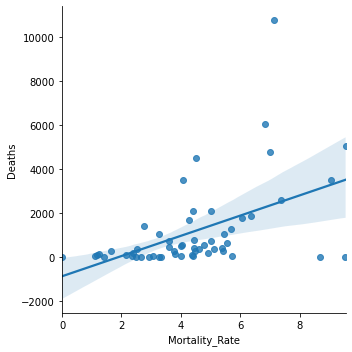

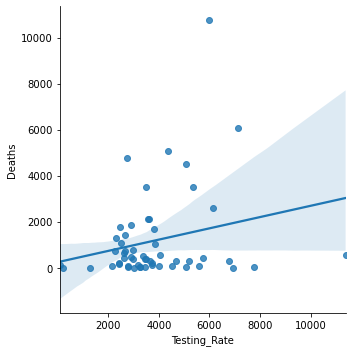

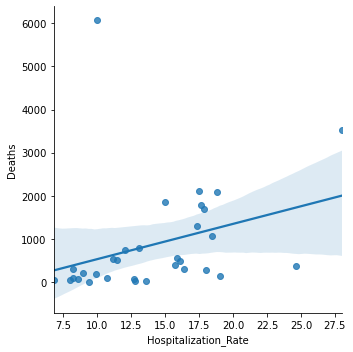

In [27]:
plt.figure(figsize=(20,6))
for i,j in enumerate(df.columns[1:-1]):
    sns.lmplot(x=j, y ='Deaths', data=df)
plt.show()

Deaths is heavily dependent on almost all columns positively.

Since Deaths is also positively related to Recoveres theat means REcoveres is also positively dependent on other columns.

In [28]:
df.columns

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate',
       'z_Confirmed'],
      dtype='object')

In [29]:
df.drop("z_Confirmed",1,inplace=True)

In [30]:
corr = df.corr()
corr_sorted = corr.sort_values(by='Deaths', ascending=False)
corr_sorted

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Deaths,0.950569,1.000000,0.657796,0.894723,0.700420,0.596947,0.868399,0.496133,0.236119,0.320883
Confirmed,1.000000,0.950569,0.715161,0.964897,0.641713,0.763012,0.896684,0.358454,0.203823,0.282873
Active,0.964897,0.894723,0.486260,1.000000,0.602002,0.741136,0.875712,0.314297,0.184509,0.258234
People_Hospitalized,0.896684,0.868399,0.307939,0.875712,0.590779,0.732600,1.000000,0.668013,0.078721,0.578519
Incident_Rate,0.641713,0.700420,0.363686,0.602002,1.000000,0.226010,0.590779,0.306411,0.581086,0.126487
Recovered,0.715161,0.657796,1.000000,0.486260,0.363686,0.890609,0.307939,0.263507,0.085174,0.138484
People_Tested,0.763012,0.596947,0.890609,0.741136,0.226010,1.000000,0.732600,0.120864,0.093266,0.267862
Mortality_Rate,0.358454,0.496133,0.263507,0.314297,0.306411,0.120864,0.668013,1.000000,0.113928,0.660256
Hospitalization_Rate,0.282873,0.320883,0.138484,0.258234,0.126487,0.267862,0.578519,0.660256,-0.169235,1.000000
Testing_Rate,0.203823,0.236119,0.085174,0.184509,0.581086,0.093266,0.078721,0.113928,1.000000,-0.169235


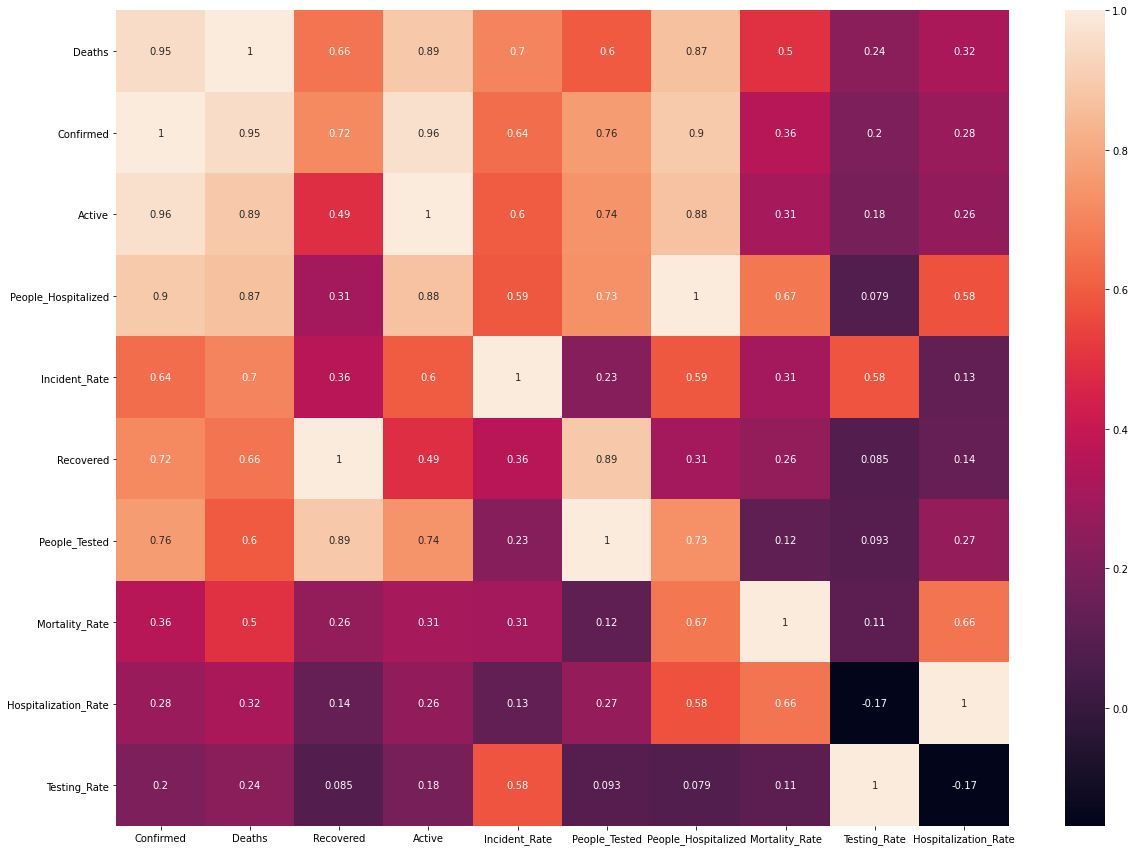

In [31]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_sorted, annot=True)
plt.show()

We can remove variables which are correlated mutually other than target variable(Death and Recovered) more than 90%.

In [32]:
corr = df.corr()
corr_C_sorted = corr.sort_values(by='Confirmed', ascending=False)
corr_C_sorted

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.950569,0.715161,0.964897,0.641713,0.763012,0.896684,0.358454,0.203823,0.282873
Active,0.964897,0.894723,0.486260,1.000000,0.602002,0.741136,0.875712,0.314297,0.184509,0.258234
Deaths,0.950569,1.000000,0.657796,0.894723,0.700420,0.596947,0.868399,0.496133,0.236119,0.320883
People_Hospitalized,0.896684,0.868399,0.307939,0.875712,0.590779,0.732600,1.000000,0.668013,0.078721,0.578519
People_Tested,0.763012,0.596947,0.890609,0.741136,0.226010,1.000000,0.732600,0.120864,0.093266,0.267862
Recovered,0.715161,0.657796,1.000000,0.486260,0.363686,0.890609,0.307939,0.263507,0.085174,0.138484
Incident_Rate,0.641713,0.700420,0.363686,0.602002,1.000000,0.226010,0.590779,0.306411,0.581086,0.126487
Mortality_Rate,0.358454,0.496133,0.263507,0.314297,0.306411,0.120864,0.668013,1.000000,0.113928,0.660256
Hospitalization_Rate,0.282873,0.320883,0.138484,0.258234,0.126487,0.267862,0.578519,0.660256,-0.169235,1.000000
Testing_Rate,0.203823,0.236119,0.085174,0.184509,0.581086,0.093266,0.078721,0.113928,1.000000,-0.169235


In [33]:
#Removing Active with correlation greater than 95% and remove People_Hospitalized with correlation ~ 90%

df.drop(["Active", "People_Hospitalized"],1,inplace=True)

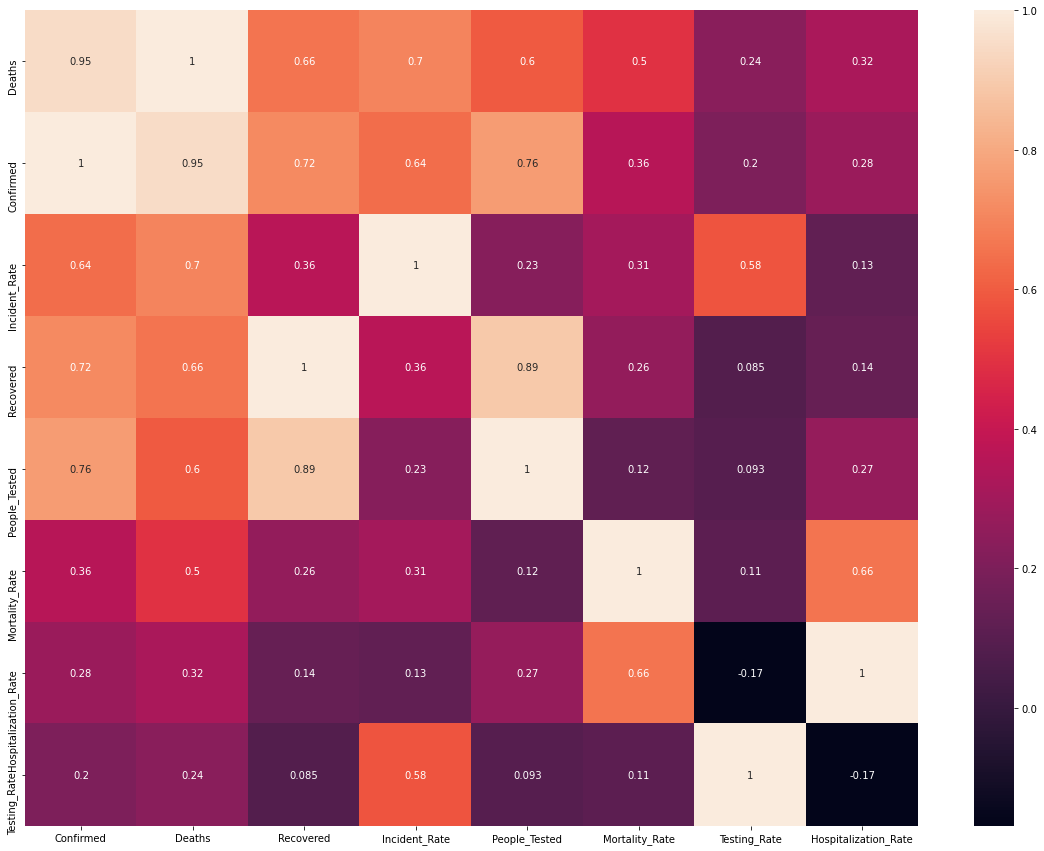

In [34]:
corr = df.corr()
corr_sorted = corr.sort_values(by='Deaths', ascending=False)
corr_sorted

#Heatmap of correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_sorted, annot=True)
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
df.describe()

,Confirmed,Deaths,Recovered,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,57.000000,57.000000,42.000000,55.000000,5.500000e+01,56.000000,55.000000,32.000000
mean,21008.473684,1136.894737,5533.952381,370.314634,2.025810e+05,4.393559,3824.250809,14.116927
std,29357.358304,1926.752335,7862.075243,356.156226,2.450166e+05,2.097200,1878.131717,4.956223
min,0.000000,0.000000,0.000000,0.000000,1.240000e+02,0.000000,97.702058,6.778043
25%,2506.000000,73.000000,855.500000,145.757324,4.585800e+04,3.032625,2693.993765,9.975440
50%,9175.000000,377.000000,2909.500000,249.130224,1.350630e+05,4.382399,3446.671231,13.330006
75%,29274.000000,1299.000000,6060.750000,453.496834,2.464665e+05,5.420247,4581.619832,17.515695
max,150776.000000,10749.000000,30341.000000,1697.509285,1.380120e+06,9.545549,11377.424693,28.054438


Other than itself rest columns don't have more than 76% positive correlation with Death, we can keep the columns present.

# Encoding

In [37]:
df.dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Incident_Rate           float64
People_Tested           float64
Mortality_Rate          float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['Province_State'] = le.fit_transform(df['Province_State'])

In [40]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               15
Incident_Rate            2
People_Tested            2
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [41]:
df['People_Tested'].describe()

count    5.500000e+01
mean     2.025810e+05
std      2.450166e+05
min      1.240000e+02
25%      4.585800e+04
50%      1.350630e+05
75%      2.464665e+05
max      1.380120e+06
Name: People_Tested, dtype: float64

In [42]:
df.loc[df['People_Tested'].isna(),'Deaths']

9     0
13    3
Name: Deaths, dtype: int64

These 2 rows were missing values for Lat and Long_ also, and now missing for People_tested as well, let's drop these 2 rows

In [43]:
df.dropna(subset=['People_Tested'], inplace=True)

In [44]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               13
Incident_Rate            0
People_Tested            0
Mortality_Rate           1
Testing_Rate             0
Hospitalization_Rate    23
dtype: int64

In [45]:
arr = ["Mortality_Rate", "Hospitalization_Rate"]
for i in arr:
    df.loc[df[i].isna(), i] = np.mean(df[i])

In [46]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               13
Incident_Rate            0
People_Tested            0
Mortality_Rate           0
Testing_Rate             0
Hospitalization_Rate     0
dtype: int64

In [47]:
arr = ['Confirmed','Incident_Rate','People_Tested','Testing_Rate']
mms = MinMaxScaler()
for i in arr:
    df[i] = mms.fit_transform(df[[i]])

In [48]:
df.describe()

,Province_State,Confirmed,Deaths,Recovered,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,55.000000,55.000000,55.000000,42.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.618182,0.144384,1178.181818,5533.952381,0.218152,0.146708,4.502346,0.330376,14.116927
std,16.566914,0.196407,1949.458492,7862.075243,0.209811,0.177549,2.017370,0.166505,3.755215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.101269,0.000000,6.778043
25%,15.500000,0.022109,83.500000,855.500000,0.085865,0.033141,3.256718,0.230173,12.726003
50%,29.000000,0.073765,393.000000,2909.500000,0.146762,0.097782,4.415327,0.296902,14.116927
75%,42.500000,0.194693,1362.500000,6060.750000,0.267154,0.178510,5.435577,0.397520,15.365623
max,56.000000,1.000000,10749.000000,30341.000000,1.000000,1.000000,9.545549,1.000000,28.054438


In [49]:
#Let's treat 2 datasets one having only Deaths as Target variable and another one having Recovered as Target variable.

dfD = df.drop("Recovered",1)
dfR = df.drop("Deaths",1)

In [50]:
corr = dfD.corr()
corr_D = corr.sort_values(by='Deaths', ascending=False)
corr_D

,Province_State,Confirmed,Deaths,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Deaths,-0.100885,0.950066,1.000000,0.700420,0.596947,0.489064,0.236119,0.157197
Confirmed,-0.104697,1.000000,0.950066,0.641713,0.763012,0.337629,0.203823,0.136855
Incident_Rate,-0.117779,0.641713,0.700420,1.000000,0.226010,0.303271,0.581086,0.084392
People_Tested,-0.122302,0.763012,0.596947,0.226010,1.000000,0.120083,0.093266,0.127903
Mortality_Rate,-0.053606,0.337629,0.489064,0.303271,0.120083,1.000000,0.109906,0.432054
Testing_Rate,0.073536,0.203823,0.236119,0.581086,0.093266,0.109906,1.000000,-0.135521
Hospitalization_Rate,-0.153925,0.136855,0.157197,0.084392,0.127903,0.432054,-0.135521,1.000000
Province_State,1.000000,-0.104697,-0.100885,-0.117779,-0.122302,-0.053606,0.073536,-0.153925


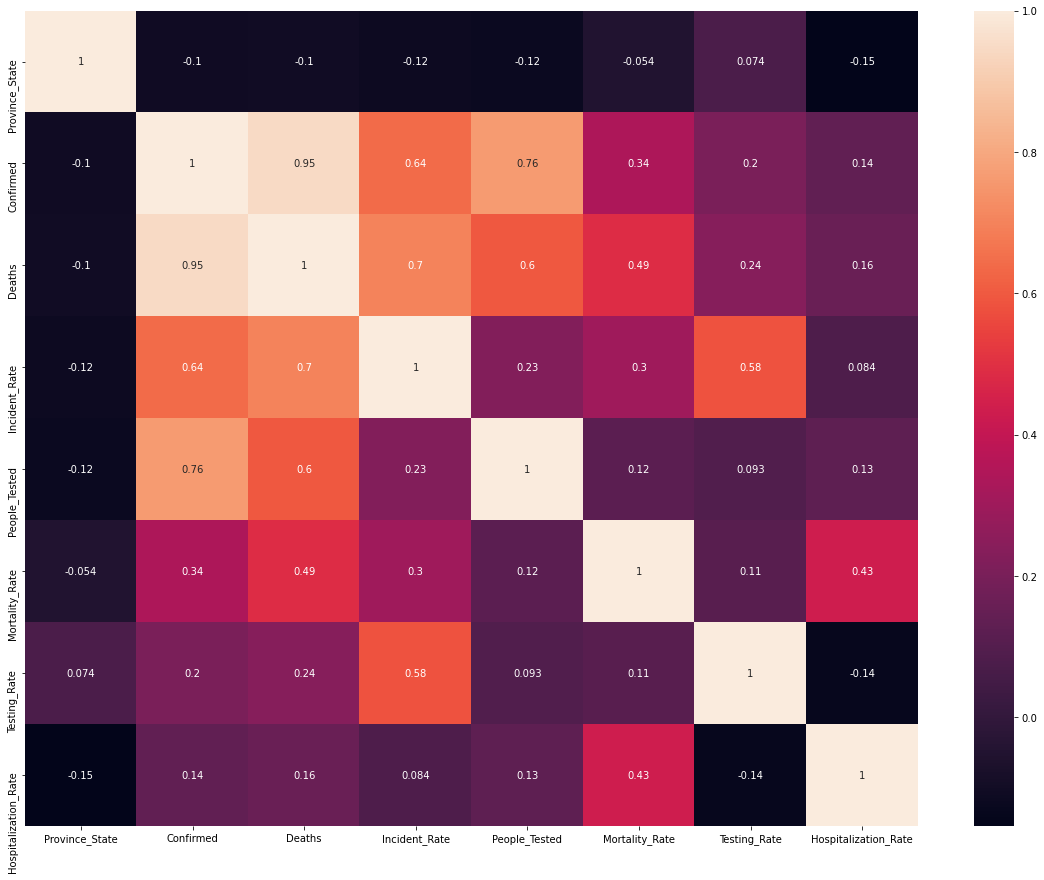

In [51]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

Other than itself and Confirmed, rest columns don't have more than 70% positive correlation with Death, we can keep the columns present.

In [52]:
corr = dfR.corr()
corr_R = corr.sort_values(by='Recovered', ascending=False)
corr_R

,Province_State,Confirmed,Recovered,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Recovered,0.097419,0.715161,1.000000,0.363686,0.890609,0.260768,0.085174,0.052991
People_Tested,-0.122302,0.763012,0.890609,0.226010,1.000000,0.120083,0.093266,0.127903
Confirmed,-0.104697,1.000000,0.715161,0.641713,0.763012,0.337629,0.203823,0.136855
Incident_Rate,-0.117779,0.641713,0.363686,1.000000,0.226010,0.303271,0.581086,0.084392
Mortality_Rate,-0.053606,0.337629,0.260768,0.303271,0.120083,1.000000,0.109906,0.432054
Province_State,1.000000,-0.104697,0.097419,-0.117779,-0.122302,-0.053606,0.073536,-0.153925
Testing_Rate,0.073536,0.203823,0.085174,0.581086,0.093266,0.109906,1.000000,-0.135521
Hospitalization_Rate,-0.153925,0.136855,0.052991,0.084392,0.127903,0.432054,-0.135521,1.000000


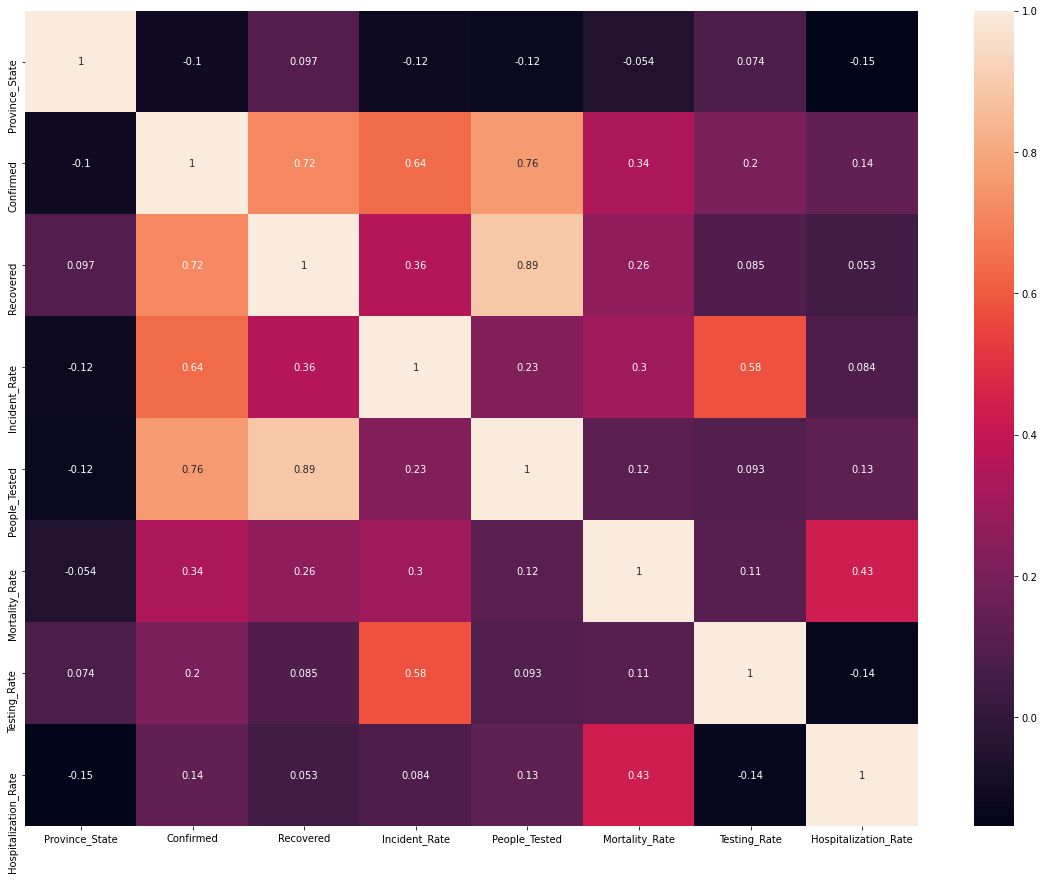

In [53]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

Other than itself rest columns don't have more than 76% positive correlation with Death, we can keep the columns present.

# Deaths Regression

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X = dfD.drop("Deaths",1)
Y = dfD['Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [55]:
#Models Import
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Metrics Import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
def classify(model, x, y):
    # Model training
    model.fit(x, y)
    pred = model.predict(x)
    print("MSE is:",mean_squared_error(y,pred))
    #Cross validation
    score = cross_val_score(model, x,y, cv=5)
    print("Cross validation score is :",np.abs(np.mean(score)))
    return np.abs(np.mean(score))

In [57]:
def rstate(model, Y):
    mse = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred))
    return mse.index(max(mse))+1

#Regression
lm = LinearRegression()
rr = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

In [58]:
#Regression Random State calculation
print("----------------------Regression------------------------------")
lmRS = rstate(lm, Y)
print("Linear Model best random state is: ",lmRS)
rrRS = rstate(rr, Y)
print("Ridge Model best random state is: ",rrRS)
lsRS = rstate(ls, Y)
print("Lasso Model best random state is: ",lsRS)
dtrRS = rstate(dtr, Y)
print("Decision Tree Model best random state is: ",dtrRS)
rfrRS = rstate(rfr, Y)
print("Random Forest Model best random state is: ",rfrRS)
etrRS = rstate(etr, Y)
print("Extra Trees Model best random state is: ",etrRS)
gbrRS = rstate(gbr, Y)
print("Gradient Boost Model best random state is: ",gbrRS)
print("------------------------------------------------------------------")

----------------------Regression------------------------------
Linear Model best random state is:  5
Ridge Model best random state is:  5
Lasso Model best random state is:  5
Decision Tree Model best random state is:  132
Random Forest Model best random state is:  171
Extra Trees Model best random state is:  171
Gradient Boost Model best random state is:  5
------------------------------------------------------------------


In [59]:
#Regression Parameters
rrparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': [rrRS]}
lsparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': [lsRS]}
dtrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'min_samples_split' : range(10),
            'random_state' : [dtrRS]}
rfrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'n_estimators' : range(50,80), 'random_state' : [rfrRS]}
etrparams = {'criterion' : ['mse', 'friedman_mse', 'mae'], 'min_samples_split' : range(10),
            'random_state' : [etrRS]}
gbrparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80),
             'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : [gbrRS]}

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=.3, random_state=lmRS)
lm.fit(X_train2, y_train2)
pred = lm.predict(X_test2)
print("Mean squared error is:",mean_squared_error(y_test2, pred))
score = cross_val_score(lm, X,Y, cv=5, scoring='r2')
print("R2 score is:",np.mean(score))

Mean squared error is: 1186478.8363278937
R2 score is: 0.7424336377870896


Model is not over fitting, as R2 score is appropriate.

In [61]:
rrgs = GridSearchCV(rr, rrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
rrgs.fit(X, Y)
rrDF = pd.DataFrame(rrgs.cv_results_)
rrDF['mean_test_score'] = np.abs(rrDF['mean_test_score'])
rrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
0,"{'alpha': 0.0001, 'random_state': 5}",3.742831e+05
1,"{'alpha': 0.001, 'random_state': 5}",3.750501e+05
2,"{'alpha': 0.01, 'random_state': 5}",3.865373e+05
3,"{'alpha': 0.1, 'random_state': 5}",5.680555e+05
4,"{'alpha': 1.0, 'random_state': 5}",1.294767e+06


In [62]:
#rrDF.loc[0,'mean_test_score']

In [63]:
lsgs = GridSearchCV(ls, lsparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
lsgs.fit(X, Y)
lsDF = pd.DataFrame(lsgs.cv_results_)
lsDF['mean_test_score'] = np.abs(lsDF['mean_test_score'])
lsDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
4,"{'alpha': 1.0, 'random_state': 5}",370240.393328
3,"{'alpha': 0.1, 'random_state': 5}",373577.728741
2,"{'alpha': 0.01, 'random_state': 5}",374142.053373
1,"{'alpha': 0.001, 'random_state': 5}",374197.293786
0,"{'alpha': 0.0001, 'random_state': 5}",374202.717287


In [64]:
#lsDF.loc[0,'mean_test_score']

In [65]:
dtrgs = GridSearchCV(dtr, dtrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
dtrgs.fit(X, Y)
dtrDF = pd.DataFrame(dtrgs.cv_results_)
dtrDF['mean_test_score'] = np.abs(dtrDF['mean_test_score'])
dtrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
23,"{'criterion': 'mae', 'min_samples_split': 3, '...",1.010682e+06
26,"{'criterion': 'mae', 'min_samples_split': 6, '...",1.129455e+06
27,"{'criterion': 'mae', 'min_samples_split': 7, '...",1.154944e+06
3,"{'criterion': 'mse', 'min_samples_split': 3, '...",1.157515e+06
13,"{'criterion': 'friedman_mse', 'min_samples_spl...",1.157515e+06
29,"{'criterion': 'mae', 'min_samples_split': 9, '...",1.190865e+06
28,"{'criterion': 'mae', 'min_samples_split': 8, '...",1.192633e+06
25,"{'criterion': 'mae', 'min_samples_split': 5, '...",1.246419e+06
15,"{'criterion': 'friedman_mse', 'min_samples_spl...",1.404802e+06
5,"{'criterion': 'mse', 'min_samples_split': 5, '...",1.404802e+06


In [66]:
#dtrDF.loc[12,'mean_test_score']

In [67]:
rfrgs = GridSearchCV(rfr, rfrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
rfrgs.fit(X, Y)
rfrDF = pd.DataFrame(rfrgs.cv_results_)
rfrDF['mean_test_score'] = np.abs(rfrDF['mean_test_score'])
rfrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
61,"{'criterion': 'mae', 'n_estimators': 51, 'rand...",1.234537e+06
60,"{'criterion': 'mae', 'n_estimators': 50, 'rand...",1.239440e+06
76,"{'criterion': 'mae', 'n_estimators': 66, 'rand...",1.242497e+06
30,"{'criterion': 'friedman_mse', 'n_estimators': ...",1.242725e+06
0,"{'criterion': 'mse', 'n_estimators': 50, 'rand...",1.242725e+06
...,...,...
115,"{'criterion': 'poisson', 'n_estimators': 75, '...",NaN
116,"{'criterion': 'poisson', 'n_estimators': 76, '...",NaN
117,"{'criterion': 'poisson', 'n_estimators': 77, '...",NaN
118,"{'criterion': 'poisson', 'n_estimators': 78, '...",NaN


In [68]:
#rfrDF.loc[47,'mean_test_score']

In [69]:
etrgs = GridSearchCV(etr, etrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
etrgs.fit(X, Y)
etrDF = pd.DataFrame(etrgs.cv_results_)
etrDF['mean_test_score'] = np.abs(etrDF['mean_test_score'])
etrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
22,"{'criterion': 'mae', 'min_samples_split': 2, '...",9.334293e+05
2,"{'criterion': 'mse', 'min_samples_split': 2, '...",9.576858e+05
12,"{'criterion': 'friedman_mse', 'min_samples_spl...",9.576858e+05
24,"{'criterion': 'mae', 'min_samples_split': 4, '...",9.841894e+05
23,"{'criterion': 'mae', 'min_samples_split': 3, '...",9.985405e+05
3,"{'criterion': 'mse', 'min_samples_split': 3, '...",1.003836e+06
13,"{'criterion': 'friedman_mse', 'min_samples_spl...",1.003836e+06
14,"{'criterion': 'friedman_mse', 'min_samples_spl...",1.046356e+06
4,"{'criterion': 'mse', 'min_samples_split': 4, '...",1.046419e+06
25,"{'criterion': 'mae', 'min_samples_split': 5, '...",1.054071e+06


In [70]:
#etrDF.loc[22,'mean_test_score']

In [71]:
gbrgs = GridSearchCV(gbr, gbrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
gbrgs.fit(X, Y)
gbrDF = pd.DataFrame(gbrgs.cv_results_)
gbrDF['mean_test_score'] = np.abs(gbrDF['mean_test_score'])
gbrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)

,params,mean_test_score
188,"{'criterion': 'friedman_mse', 'loss': 'huber',...",1.063058e+06
186,"{'criterion': 'friedman_mse', 'loss': 'huber',...",1.064155e+06
187,"{'criterion': 'friedman_mse', 'loss': 'huber',...",1.065109e+06
184,"{'criterion': 'friedman_mse', 'loss': 'huber',...",1.068768e+06
185,"{'criterion': 'friedman_mse', 'loss': 'huber',...",1.069927e+06
...,...,...
334,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",3.031557e+06
333,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",3.053112e+06
332,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",3.056998e+06
331,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",3.092444e+06


In [72]:
#gbrDF.loc[59,'mean_test_score']

# Lasso Seems best Model in Deaths case study

# Recovered Regression

In [73]:
dum_Data = df.dropna(subset=['Recovered'], inplace=False)
X_train1 = dum_Data.drop(["Recovered", "Deaths"],1)
y_train1 = dum_Data["Recovered"]
dum_Data = df[df["Recovered"].isna()]
X_test1 = dum_Data.drop(["Recovered", "Deaths"],1)
y_test1 = dum_Data["Recovered"]

Let's find out the best Lasso Model and save it

In [76]:
print(X_train.shape)
print(y_train.shape)
ls_model = lsgs.fit(X_train, y_train).best_estimator_
ls_model.fit(X_train, y_train)
pred = ls_model.predict(X_test)
pred

(41, 7)
(41,)


array([ 2761.76558185,   654.2274401 ,   781.29413189,  6231.43933747,
         262.70351523,   234.51868823, 10572.22553775,   429.18254612,
        1915.99297749,  -233.62231588,   101.45972148,  -258.93212754,
        4671.97822726,   688.96354446])

In [77]:
ls_model.fit(X_train1, y_train1)
pred = ls_model.predict(X_test1)

In [78]:
y_train1.describe()

count       42.000000
mean      5533.952381
std       7862.075243
min          0.000000
25%        855.500000
50%       2909.500000
75%       6060.750000
max      30341.000000
Name: Recovered, dtype: float64

In [79]:
import joblib

In [80]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(ls_model, filename)

['final_model.pkl']